<a href="https://colab.research.google.com/github/JorgeR47/EjercicioEdadUsuario/blob/main/Deber_16DIC_Regresion_LimpiezaCr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=7bd099d8c8c415e840791ac0f0f89867e6b6720231795245d4b756467b067ded
  Stored in directory: /root/.cache/pip/wheels/df/20/91/e4850b9a31cf660c1bc95515d3bcbc8010e869e5de6d5baf07
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=351a62b841f8990eeb5c9be4796bfca53693015527146dcf07fd215985beeef2
  Stored in directory: /root/.cache/pip/wheels/89/11/61/aa5a3167bfff49218cd043a73a83034b9eadd858b0059521be
Successfully built fancyimpute knnimpute


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import re
import missingno as msno
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer as MI
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('/content/test.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [ ]:
df2 = df.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [ ]:
df2.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  object 
 1   Age                       50000 non-null  object 
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  object 
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  object 
 9   Type_of_Loan              44296 non-null  object 
 10  Delay_from_due_date       50000 non-null  int64  
 11  Num_of_Delayed_Payment    46502 non-null  object 
 12  Changed_Credit_Limit      50000 non-null  object 
 13  Num_Credit_Inquiries      48965 non-null  float64
 14  Credit

In [ ]:
df2['Type_of_Loan'].value_counts()

,count
Type_of_Loan,
Not Specified,704
Credit-Builder Loan,640
Personal Loan,636
Debt Consolidation Loan,632
Student Loan,620
...,...
"Debt Consolidation Loan, Personal Loan, Mortgage Loan, Personal Loan, Not Specified, Mortgage Loan, and Home Equity Loan",4
"Student Loan, Home Equity Loan, Student Loan, Personal Loan, Not Specified, Auto Loan, Auto Loan, and Debt Consolidation Loan",4
"Not Specified, Auto Loan, Auto Loan, and Debt Consolidation Loan",4


In [ ]:
def procesar_loan(column):
  def split_loan(s):
    s = str(s).replace(' and ', ', ')
    part = [p.strip() for p in s.split(',')]
    return list(dict.fromkeys(part))
  df_clean = pd.DataFrame()
  df_clean['Type_of_Loan'] = column
  df_clean['loan_list'] = df_clean['Type_of_Loan'].apply(split_loan)

  exploded_df = df_clean['loan_list'].explode()
  dummies = pd.get_dummies(exploded_df).groupby(level=0).max().astype(int)

  dummies = dummies.loc[:, dummies.columns.str.strip()!='']
  dummies = dummies.drop(columns=['nan'], errors='ignore')
  df_result = pd.concat([df_clean[['Type_of_Loan']], dummies], axis=1)

  return df_result

In [ ]:
loan_data = procesar_loan(df2['Type_of_Loan'])

In [ ]:
loan_data

,Type_of_Loan,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
1,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
2,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,1,0,1,0,0,0,1,0
4,Credit-Builder Loan,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
49995,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",1,0,0,0,1,0,0,1,1
49996,"Auto Loan, and Student Loan",1,0,0,0,0,0,0,0,1
49997,"Auto Loan, and Student Loan",1,0,0,0,0,0,0,0,1
49998,"Auto Loan, and Student Loan",1,0,0,0,0,0,0,0,1


In [ ]:
df2 = pd.concat([df2, loan_data], axis=1)
df2.drop(['Type_of_Loan'], axis=1, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  object 
 1   Age                       50000 non-null  object 
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  object 
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  object 
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

In [ ]:
df2

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,September,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,186.26670208571772,1,1,0,1,0,0,0,1,0
1,October,24,Scientist,19114.12,1824.843333,3,4,3,4,3,...,361.44400385378196,1,1,0,1,0,0,0,1,0
2,November,24,Scientist,19114.12,1824.843333,3,4,3,4,-1,...,264.67544623342997,1,1,0,1,0,0,0,1,0
3,December,24_,Scientist,19114.12,NaN,3,4,3,4,4,...,343.82687322383634,1,1,0,1,0,0,0,1,0
4,September,28,_______,34847.84,3037.986667,2,4,6,1,3,...,485.2984336755923,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,December,4975,Architect,20002.88,1929.906667,10,8,29,5,33,...,275.53956951573343,1,0,0,0,1,0,0,1,1
49996,September,25,Mechanic,39628.99,NaN,4,6,7,2_,20,...,409.39456169535066,1,0,0,0,0,0,0,0,1
49997,October,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,...,349.7263321025098,1,0,0,0,0,0,0,0,1
49998,November,25,Mechanic,39628.99,NaN,4,6,7,2_,21,...,463.23898098947717,1,0,0,0,0,0,0,0,1


In [ ]:
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12,
}

In [ ]:
df2['Month'] = df2['Month'].str.strip().str.capitalize().map(month_to_number)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  int64  
 1   Age                       50000 non-null  object 
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  object 
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  object 
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

In [ ]:
df2['Age'] = pd.to_numeric(df2['Age'], errors='coerce')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  int64  
 1   Age                       47523 non-null  float64
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  object 
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  object 
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

In [ ]:
max_value = df2['Age'].max()
min_value = df2['Age'].min()
print(max_value)
print(min_value)

8688.0
-500.0


In [ ]:
df2['Age'] = df2['Age'].apply(lambda x: x if 0 <= x <= 100 else np.nan)
#df2['Age'] = df2['Age'].fillna

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  int64  
 1   Age                       46164 non-null  float64
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  object 
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  object 
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

In [ ]:
df2['Occupation'].value_counts()

,count
Occupation,
_______,3438
Lawyer,3324
Engineer,3212
Architect,3195
Mechanic,3168
Developer,3146
Accountant,3133
Media_Manager,3130
Scientist,3104


In [ ]:
le = LabelEncoder()
df2['Occupation'] = le.fit_transform(df2['Occupation'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  int64  
 1   Age                       46164 non-null  float64
 2   Occupation                50000 non-null  int64  
 3   Annual_Income             50000 non-null  object 
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  object 
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

In [ ]:
df2['Annual_Income'].value_counts()

,count
Annual_Income,
72524.2,8
95596.35,8
36585.12,8
22434.16,8
9141.63,8
...,...
20601508.0,1
29469.98_,1
18940.82_,1


In [ ]:
df2['Annual_Income'] = pd.to_numeric(df2['Annual_Income'], errors='coerce')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  int64  
 1   Age                       46164 non-null  float64
 2   Occupation                50000 non-null  int64  
 3   Annual_Income             46480 non-null  float64
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  object 
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

In [ ]:
df2['Num_of_Loan'].value_counts()

,count
Num_of_Loan,
2,7173
3,7114
4,6982
0,5163
1,5029
...,...
1304,1
569,1
350,1


In [ ]:
df2['Num_of_Loan'] = pd.to_numeric(df2['Num_of_Loan'], errors='coerce')

In [ ]:
df2['Num_of_Delayed_Payment'].value_counts()

,count
Num_of_Delayed_Payment,
19,2622
15,2594
18,2570
16,2548
17,2545
...,...
3178,1
1122,1
959,1


In [ ]:
df2['Num_of_Delayed_Payment'] = pd.to_numeric(df2['Num_of_Delayed_Payment'], errors='coerce')

In [ ]:
df2['Changed_Credit_Limit'].value_counts()

,count
Changed_Credit_Limit,
_,1059
11.5,70
11.32,63
7.35,60
7.01,60
...,...
24.3,1
1.5699999999999998,1
-1.11,1


In [ ]:
df2['Changed_Credit_Limit'] = pd.to_numeric(df2['Changed_Credit_Limit'], errors='coerce')

In [ ]:
df2['Credit_Mix'].value_counts()

,count
Credit_Mix,
Standard,18379
Good,12260
_,9805
Bad,9556


In [ ]:
df2['Credit_Mix'] = le.fit_transform(df2['Credit_Mix'])

In [ ]:
df2['Credit_Mix'].value_counts()

,count
Credit_Mix,
2,18379
1,12260
3,9805
0,9556


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  int64  
 1   Age                       46164 non-null  float64
 2   Occupation                50000 non-null  int64  
 3   Annual_Income             46480 non-null  float64
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               47564 non-null  float64
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    45075 non-null  float64
 11  Changed_Credit_Limit      48941 non-null  float64
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  int64  
 14  Outsta

In [ ]:
df2['Outstanding_Debt'].value_counts()

,count
Outstanding_Debt,
460.46,12
1109.03,12
1151.7,12
1360.45,12
978.3,8
...,...
1527.67_,1
853.94_,1
753.21_,1


In [ ]:
df2['Outstanding_Debt'] = pd.to_numeric(df2['Outstanding_Debt'], errors='coerce')

In [ ]:
df2['Credit_History_Age'].value_counts()

,count
Credit_History_Age,
20 Years and 1 Months,254
16 Years and 1 Months,254
18 Years and 7 Months,252
19 Years and 7 Months,252
18 Years and 6 Months,250
...,...
4 Years and 5 Months,21
0 Years and 11 Months,16
33 Years and 11 Months,15


In [ ]:
def credit_history_to_months(s):
    if pd.isna(s):
        return np.nan
    parts = str(s).replace(' Years and ', ' ').replace(' Months', '').split(' ')
    if len(parts) == 2:
        try:
            years = int(parts[0])
            months = int(parts[1])
            return (years * 12) + months
        except ValueError:
            return np.nan
    return np.nan
df2['Credit_History_Age'] = df2['Credit_History_Age'].apply(credit_history_to_months)

In [ ]:
df2['Credit_History_Age'].value_counts()

,count
Credit_History_Age,
241.0,254
193.0,254
223.0,252
235.0,252
222.0,250
...,...
53.0,21
11.0,16
407.0,15


In [ ]:
df2['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,26158
No,17849
NM,5993


In [ ]:
df2['Payment_of_Min_Amount'] = le.fit_transform(df2['Payment_of_Min_Amount'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  int64  
 1   Age                       46164 non-null  float64
 2   Occupation                50000 non-null  int64  
 3   Annual_Income             46480 non-null  float64
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               47564 non-null  float64
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    45075 non-null  float64
 11  Changed_Credit_Limit      48941 non-null  float64
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  int64  
 14  Outsta

In [ ]:
df2['Amount_invested_monthly'].value_counts()

,count
Amount_invested_monthly,
__10000__,2175
0.0,106
121.66817445608021,1
170.15073787772732,1
320.4566446914704,1
...,...
366.23148415217315,1
34.89940643392877,1
256.90830529853173,1


In [ ]:
df2['Amount_invested_monthly'] = pd.to_numeric(df2['Amount_invested_monthly'], errors='coerce')

In [ ]:
df2['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,12694
High_spent_Medium_value_payments,8922
High_spent_Large_value_payments,6844
Low_spent_Medium_value_payments,6837
High_spent_Small_value_payments,5651
Low_spent_Large_value_payments,5252
!@9#%8,3800


In [ ]:
df2[['Spent_level','Value_Type']] = df2['Payment_Behaviour'].str.extract(r'^(Low|High)_spent_(Small|Medium|Large)_value_payments$')

In [ ]:
df2.drop(['Payment_Behaviour'], axis=1, inplace=True)

In [ ]:
df2['Spent_level'] = le.fit_transform(df2['Spent_level'])
df2['Value_Type'] = le.fit_transform(df2['Value_Type'])

In [ ]:
df2['Monthly_Balance'].value_counts()

,count
Monthly_Balance,
__-333333333333333333333333333__,6
223.40782977501067,1
252.53294533915363,1
305.43786598764547,1
389.53754307843735,1
...,...
194.44026842190848,1
299.957837924029,1
375.897928536186,1


In [ ]:
df2['Monthly_Balance'] = pd.to_numeric(df2['Monthly_Balance'], errors='coerce')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  int64  
 1   Age                       46164 non-null  float64
 2   Occupation                50000 non-null  int64  
 3   Annual_Income             46480 non-null  float64
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               47564 non-null  float64
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    45075 non-null  float64
 11  Changed_Credit_Limit      48941 non-null  float64
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  int64  
 14  Outsta

In [ ]:
df2['Credit_Score'].value_counts()

KeyError: 'Credit_Score'

In [ ]:
df2['Credit_Score'] = le.fit_transform(df2['Credit_Score'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20229 entries, 0 to 20228
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     20229 non-null  int64  
 1   Age                       18666 non-null  float64
 2   Occupation                20229 non-null  int64  
 3   Annual_Income             18820 non-null  float64
 4   Monthly_Inhand_Salary     17207 non-null  float64
 5   Num_Bank_Accounts         20229 non-null  int64  
 6   Num_Credit_Card           20229 non-null  int64  
 7   Interest_Rate             20229 non-null  int64  
 8   Num_of_Loan               20229 non-null  object 
 9   Delay_from_due_date       20229 non-null  int64  
 10  Num_of_Delayed_Payment    18276 non-null  float64
 11  Changed_Credit_Limit      19818 non-null  float64
 12  Num_Credit_Inquiries      19824 non-null  float64
 13  Credit_Mix                20229 non-null  int64  
 14  Outsta

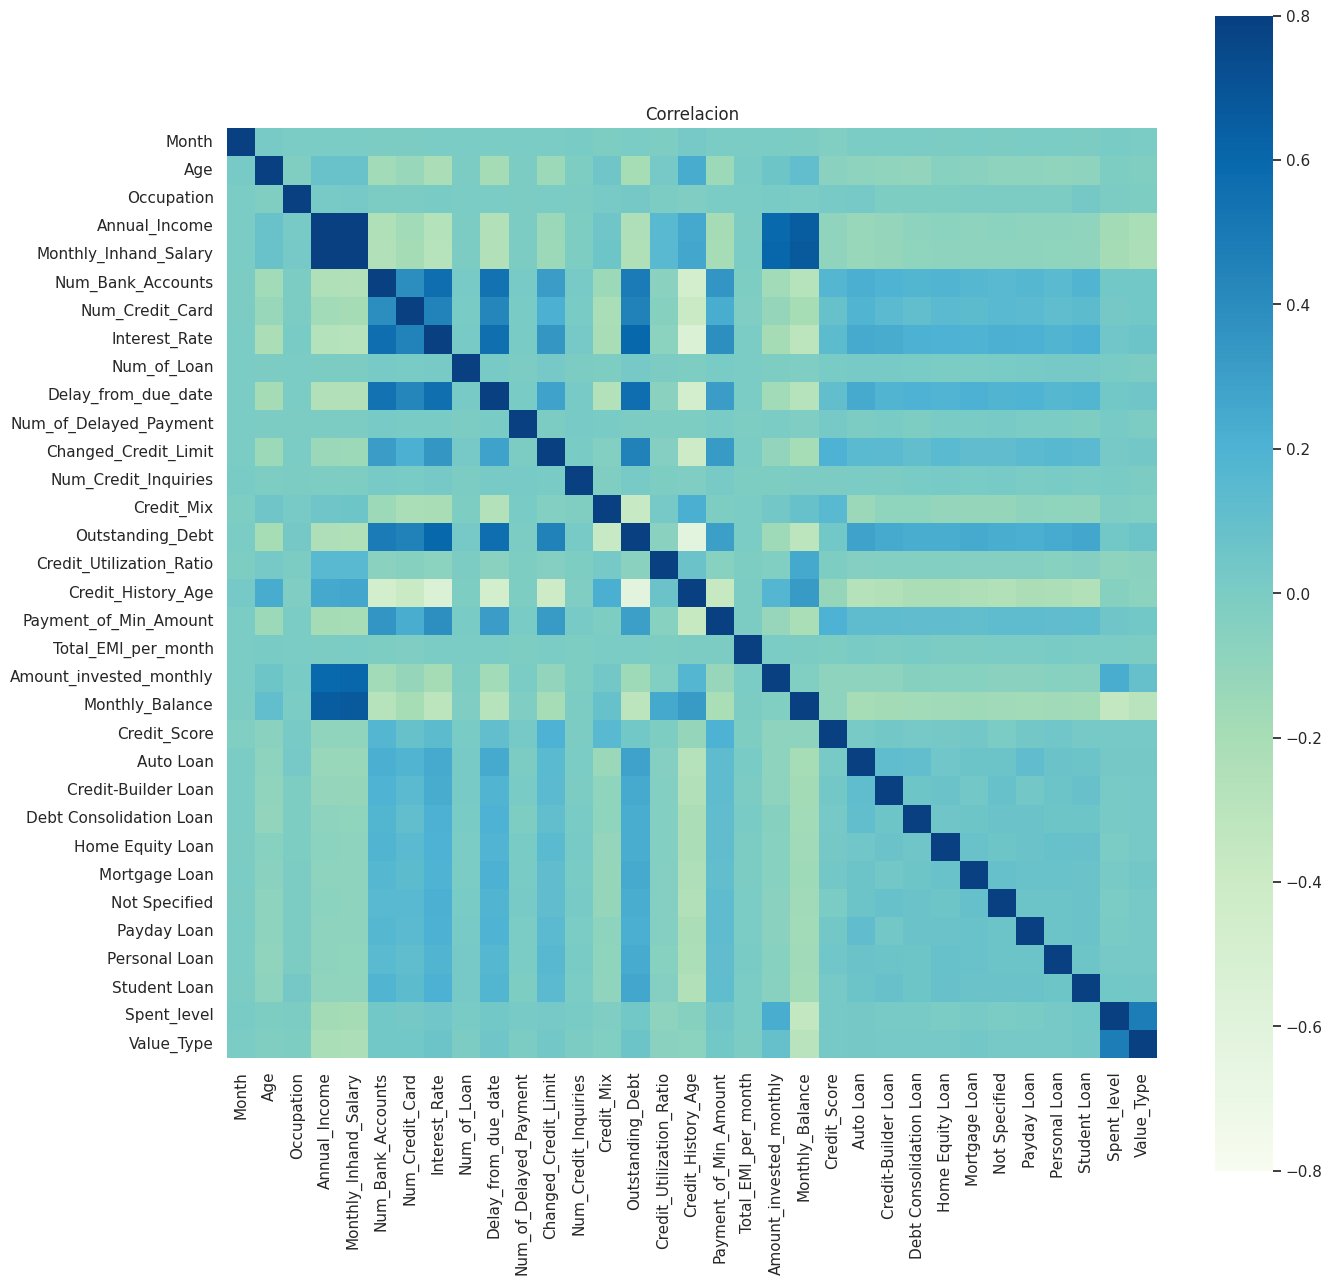

In [ ]:
df2['Num_of_Loan'] = pd.to_numeric(df2['Num_of_Loan'], errors='coerce')
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Correlacion")
sns.heatmap(df2.corr(), annot=False, vmax=0.8, vmin=-0.8, square=True, cmap="GnBu", linecolor="black")
plt.show()

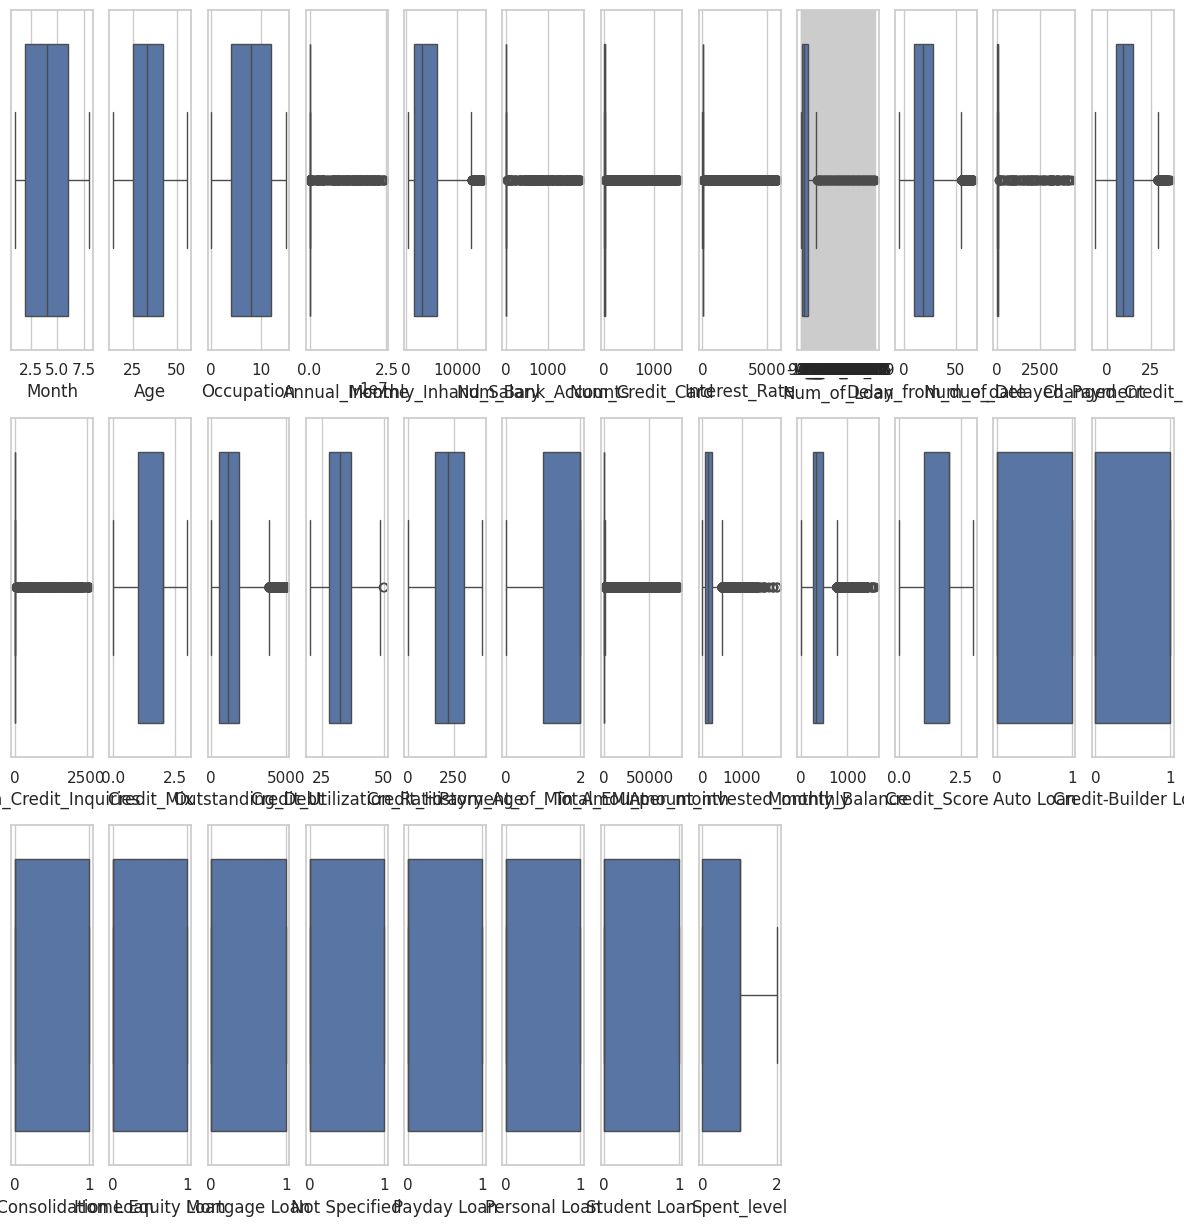

In [ ]:
plt.figure(figsize=(15,15))
c = df2.columns[:-1]
for i in enumerate(c):
  plt.subplot(3,12,i[0]+1)
  sns.boxplot(x=df2[i[1]])

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Credit_Mix'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Payment_of_Min_Amount'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>],
       [<Axes: title={'cent

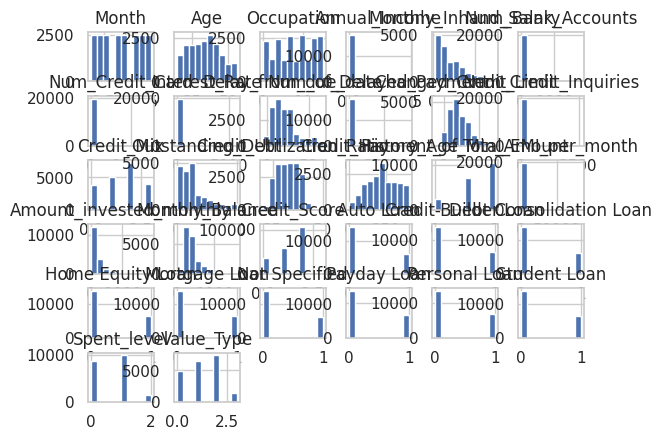

In [ ]:
df2.hist()

In [ ]:
for i in c:
  q1 = df2[i].quantile(0.10)
  q3 = df2[i].quantile(0.90)
  df2[i][df2[i]<=q1] = q1
  df2[i][df2[i]>=q3] = q3

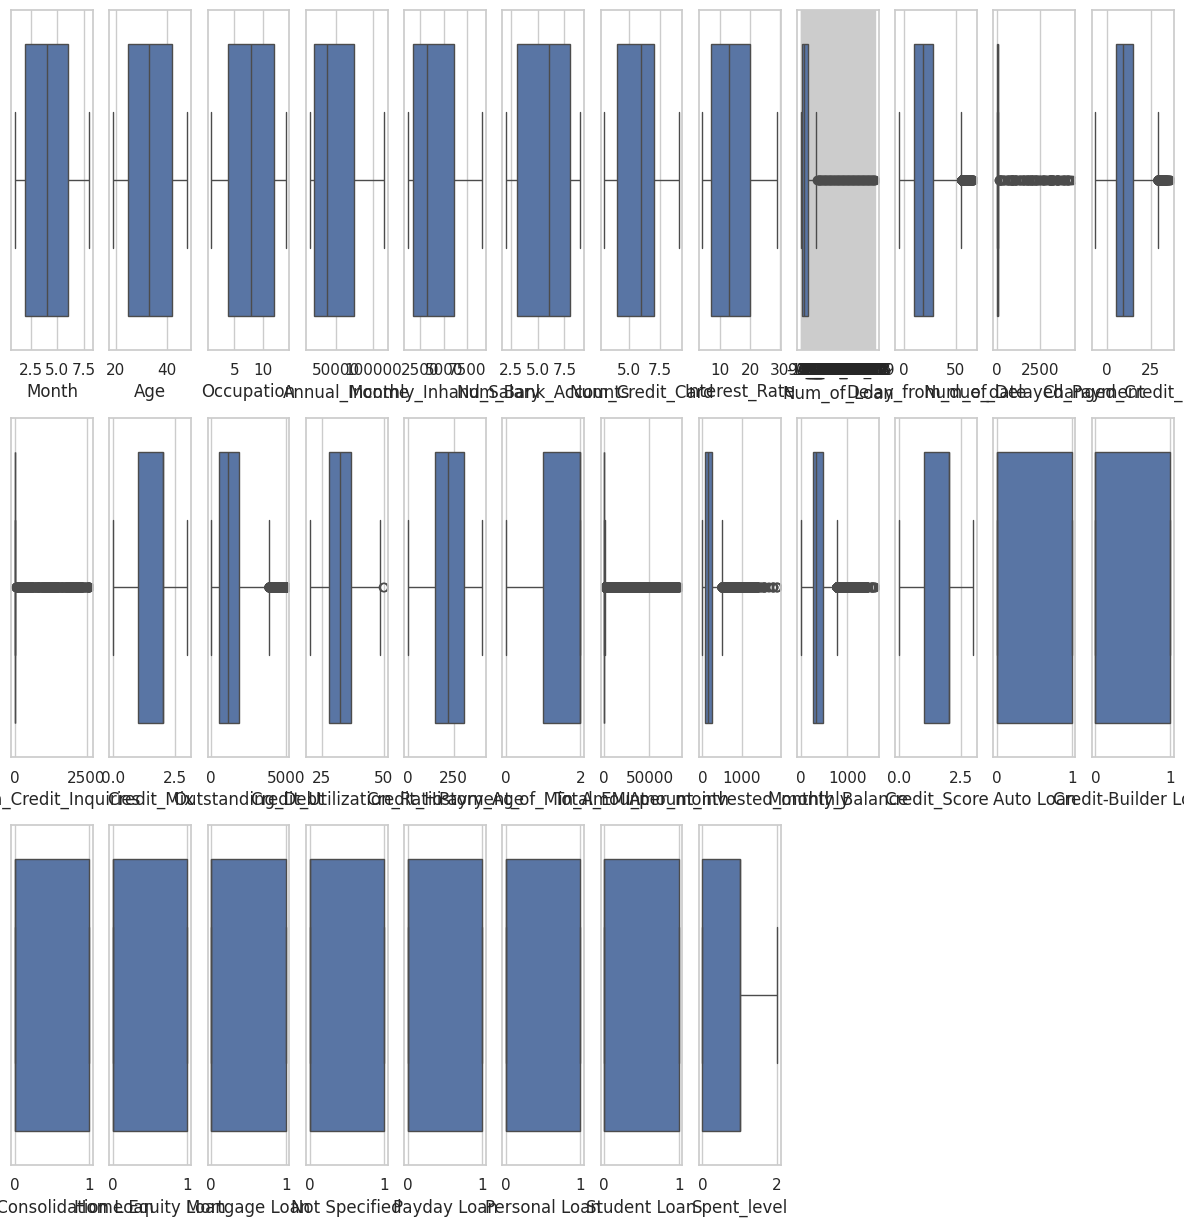

In [ ]:
plt.figure(figsize=(15,15))
c = df2.columns[:-1]
for i in enumerate(c):
  plt.subplot(3,12,i[0]+1)
  sns.boxplot(x=df2[i[1]])

<Axes: >

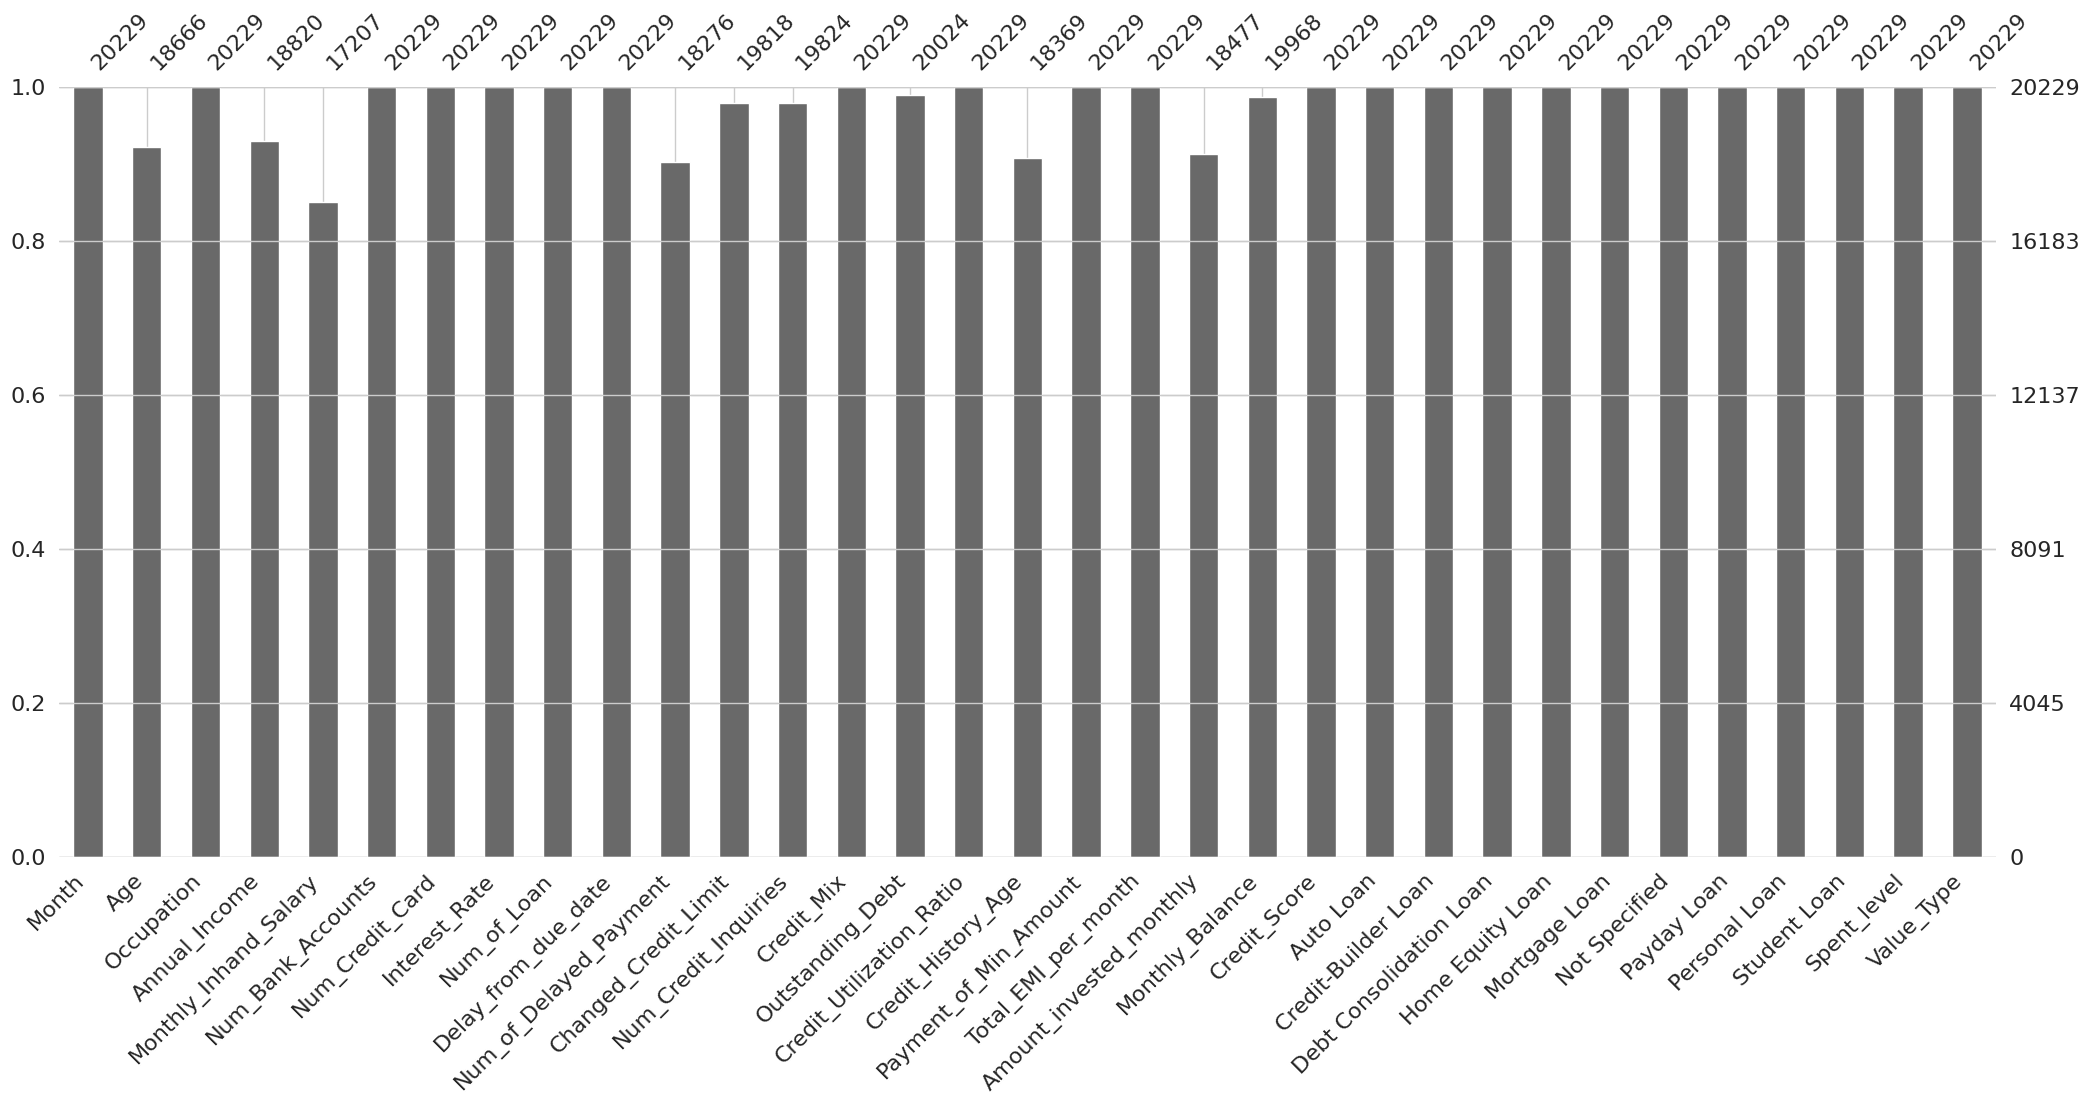

In [ ]:
msno.bar(df2)

<Axes: >

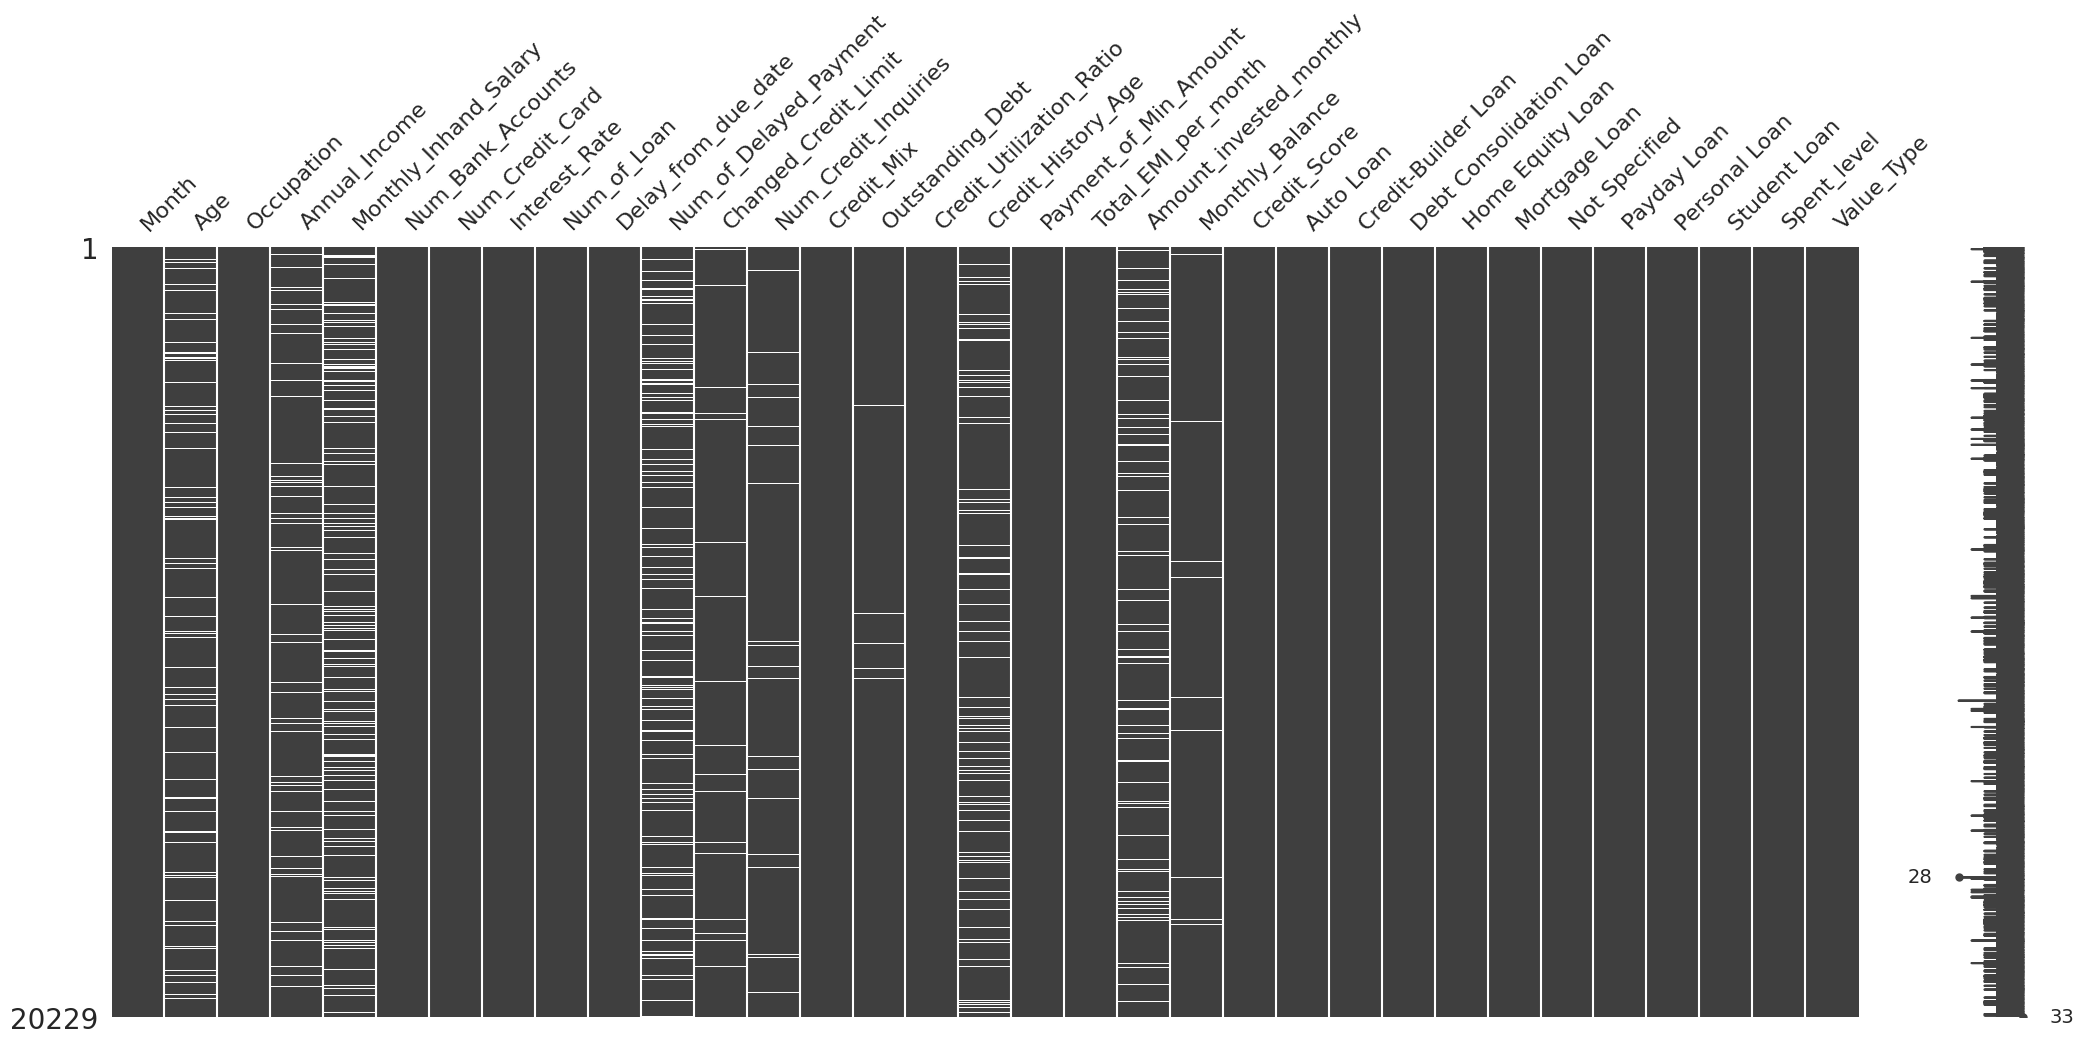

In [ ]:
msno.matrix(df2)

In [ ]:
x = df2.drop('Value_Type', axis=1)
y = df2['Value_Type']

In [ ]:
x = x.apply(pd.to_numeric, errors='coerce')
si = SimpleImputer()
X_si = pd.DataFrame(si.fit_transform(x))
X_si.columns = x.columns

<Axes: >

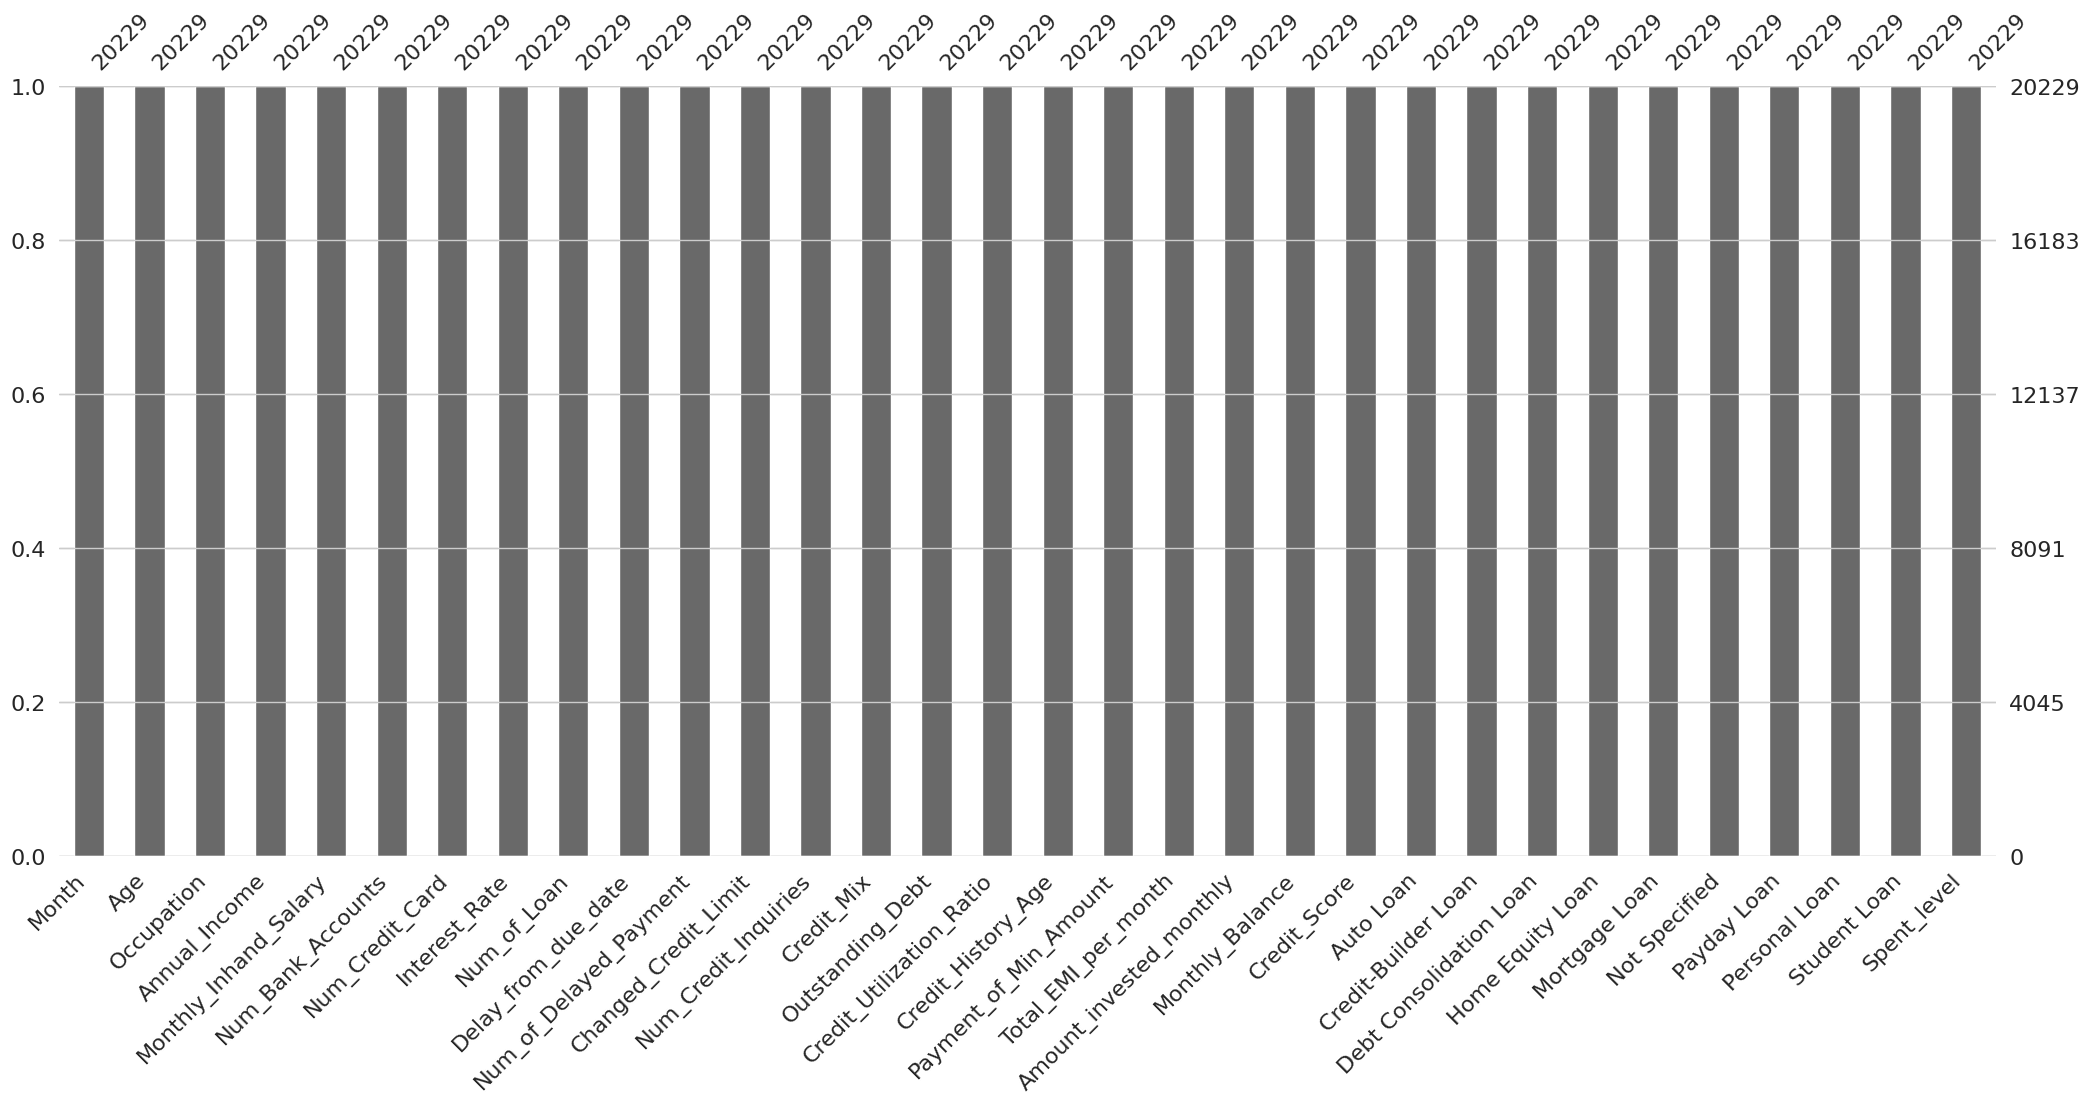

In [ ]:
msno.bar(X_si)

In [ ]:
mi = MI()
x['Num_of_Loan'] = pd.to_numeric(x['Num_of_Loan'], errors='coerce')
X_mi = pd.DataFrame(mi.fit_transform(x))
X_mi.columns = x.columns

<Axes: >

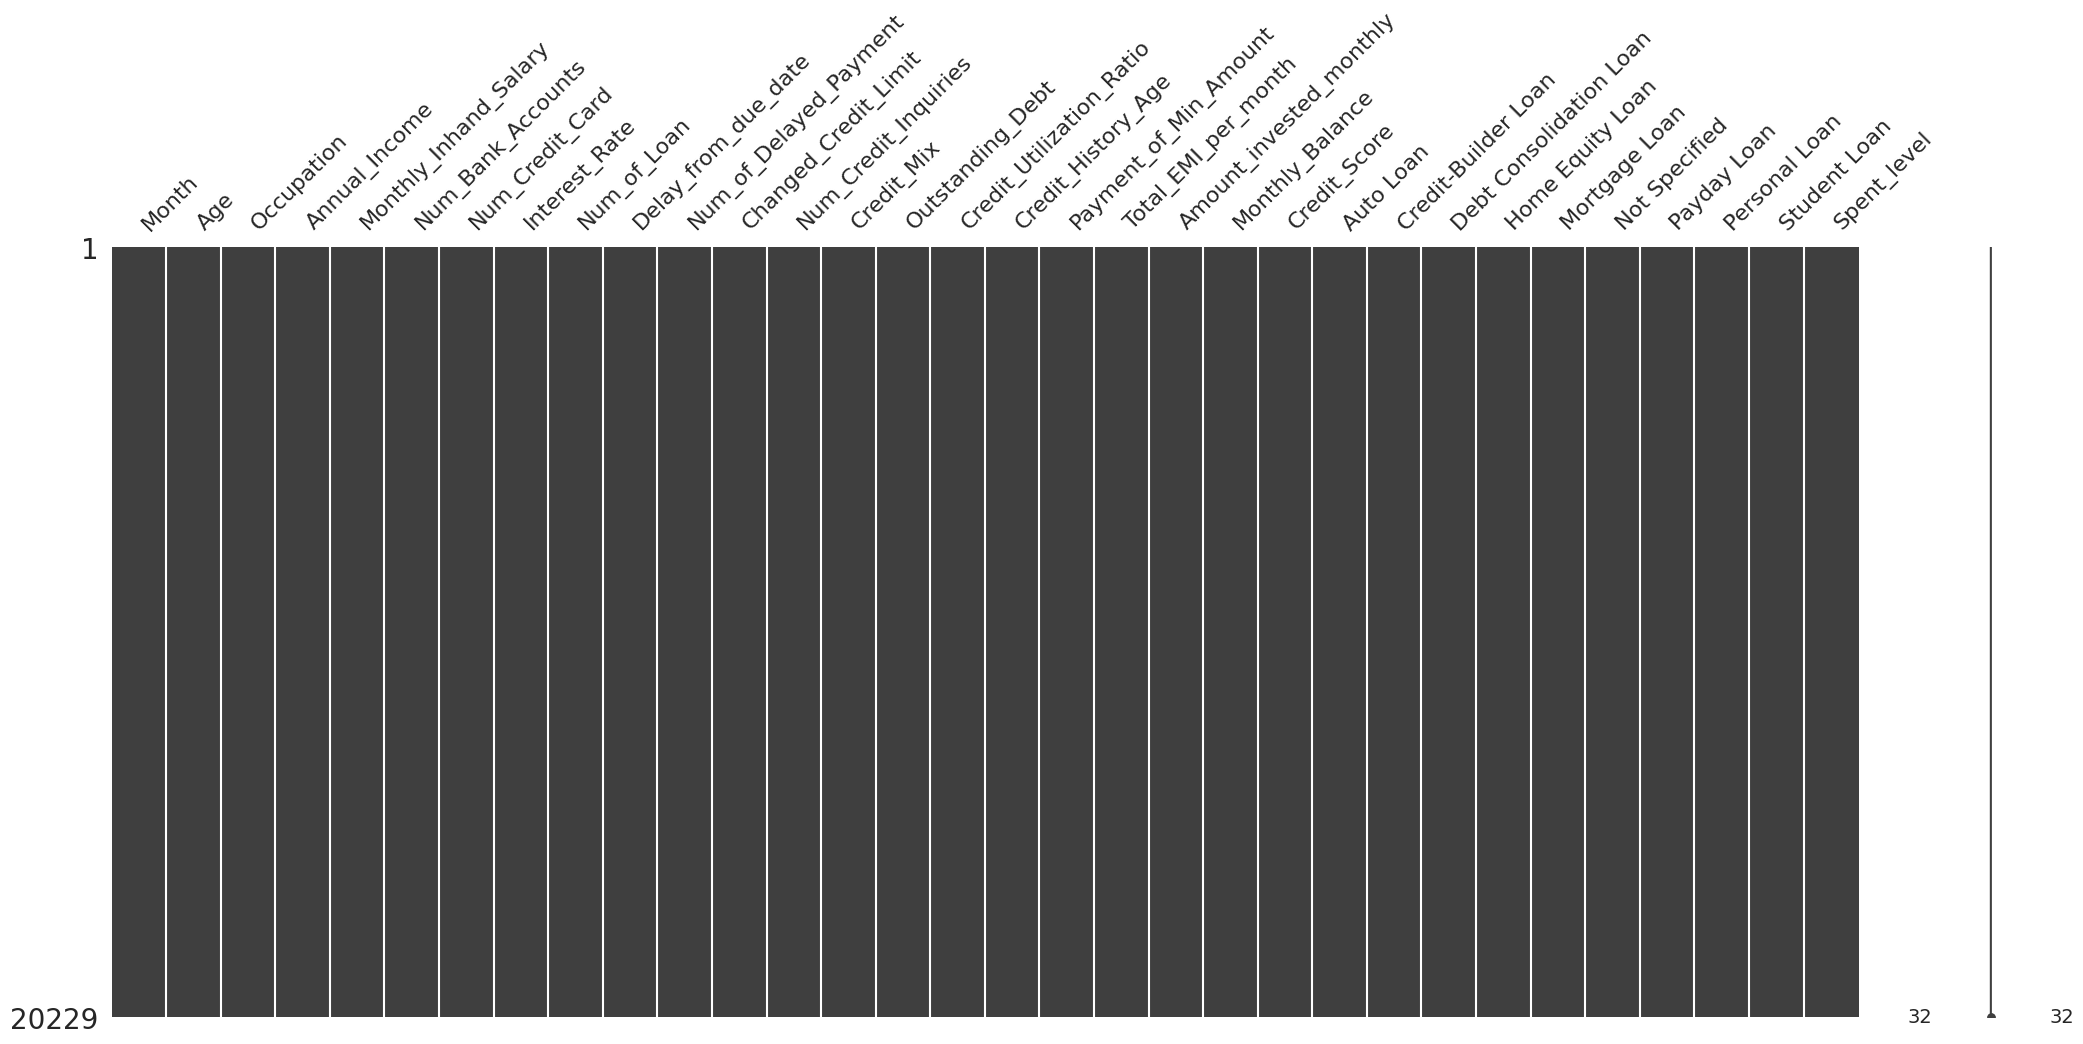

In [ ]:
msno.matrix(X_mi)

In [ ]:
y.value_counts()

,count
Value_Type,
2,7480
1,6424
0,4854
3,1471


In [ ]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_mi, y)


sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_mi, y)

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_mi, y)

In [ ]:
y_ros.value_counts()

,count
Value_Type,
2,7480
0,7480
1,7480
3,7480


In [ ]:
y_sm.value_counts()

,count
Value_Type,
2,7480
0,7480
1,7480
3,7480


In [ ]:
y_rus.value_counts()

,count
Value_Type,
0,1471
1,1471
2,1471
3,1471


In [ ]:
scaler = MinMaxScaler()
X_ros_scaled = scaler.fit_transform(X_ros)
X_sm_scaled = scaler.fit_transform(X_sm)
X_rus_scaled = scaler.fit_transform(X_rus)

In [ ]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros_scaled, y_ros, test_size=0.2, random_state=800)

In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm_scaled, y_sm, test_size=0.2, random_state=800)

In [ ]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus_scaled, y_rus, test_size=0.2, random_state=800)

In [ ]:
model_rus = SVC(random_state=500, kernel='linear')
model_rus.fit(X_train_rus, y_train_rus)

y_pred_rus = model_rus.predict(X_test_rus)

print("Accuracy:", accuracy_score(y_test_rus, y_pred_rus))
print("Confusion Matrix:\n", confusion_matrix(y_test_rus, y_pred_rus))
print("Classification Report:\n", classification_report(y_test_rus, y_pred_rus))

Accuracy: 0.6304163126593033
Confusion Matrix:
 [[113  63  97   0]
 [ 83 111 105   0]
 [ 20  67 216   0]
 [  0   0   0 302]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.41      0.46       273
           1       0.46      0.37      0.41       299
           2       0.52      0.71      0.60       303
           3       1.00      1.00      1.00       302

    accuracy                           0.63      1177
   macro avg       0.63      0.62      0.62      1177
weighted avg       0.63      0.63      0.62      1177



In [ ]:
y_pred_rus = model_rus.predict(X_train_rus)

print("Accuracy:", accuracy_score(y_train_rus, y_pred_rus))
print("Confusion Matrix:\n", confusion_matrix(y_train_rus, y_pred_rus))
print("Classification Report:\n", classification_report(y_train_rus, y_pred_rus))

Accuracy: 0.6379859783301466
Confusion Matrix:
 [[ 492  269  437    0]
 [ 272  468  432    0]
 [  65  229  874    0]
 [   0    0    0 1169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.41      0.49      1198
           1       0.48      0.40      0.44      1172
           2       0.50      0.75      0.60      1168
           3       1.00      1.00      1.00      1169

    accuracy                           0.64      4707
   macro avg       0.64      0.64      0.63      4707
weighted avg       0.64      0.64      0.63      4707



In [ ]:
model_ros = SVC(random_state=500, kernel='rbf')
model_ros.fit(X_train_ros, y_train_ros)

y_pred_ros = model_ros.predict(X_test_ros)

print("Accuracy:", accuracy_score(y_test_ros, y_pred_ros))
print("Confusion Matrix:\n", confusion_matrix(y_test_ros, y_pred_ros))
print("Classification Report:\n", classification_report(y_test_ros, y_pred_ros))

Accuracy: 0.6370320855614974
Confusion Matrix:
 [[ 716  393  405    0]
 [ 405  642  431    0]
 [ 150  388  948    0]
 [   0    0    0 1506]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.47      0.51      1514
           1       0.45      0.43      0.44      1478
           2       0.53      0.64      0.58      1486
           3       1.00      1.00      1.00      1506

    accuracy                           0.64      5984
   macro avg       0.64      0.64      0.63      5984
weighted avg       0.64      0.64      0.64      5984



In [ ]:
y_pred_ros = model_ros.predict(X_train_ros)

print("Accuracy:", accuracy_score(y_train_ros, y_pred_ros))
print("Confusion Matrix:\n", confusion_matrix(y_train_ros, y_pred_ros))
print("Classification Report:\n", classification_report(y_train_ros, y_pred_ros))

Accuracy: 0.6797292780748663
Confusion Matrix:
 [[3275 1238 1453    0]
 [1310 3107 1585    0]
 [ 546 1534 3914    0]
 [   0    0    0 5974]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.55      0.59      5966
           1       0.53      0.52      0.52      6002
           2       0.56      0.65      0.60      5994
           3       1.00      1.00      1.00      5974

    accuracy                           0.68     23936
   macro avg       0.68      0.68      0.68     23936
weighted avg       0.68      0.68      0.68     23936



In [ ]:
model_sm = SVC(random_state=500, kernel='rbf')
model_sm.fit(X_train_sm, y_train_sm)

y_pred_sm = model_sm.predict(X_test_sm)

print("Accuracy:", accuracy_score(y_test_sm, y_pred_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test_sm, y_pred_sm))
print("Classification Report:\n", classification_report(y_test_sm, y_pred_sm))

Accuracy: 0.6577540106951871
Confusion Matrix:
 [[ 766  398  350    0]
 [ 392  645  441    0]
 [ 104  363 1019    0]
 [   0    0    0 1506]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.51      0.55      1514
           1       0.46      0.44      0.45      1478
           2       0.56      0.69      0.62      1486
           3       1.00      1.00      1.00      1506

    accuracy                           0.66      5984
   macro avg       0.66      0.66      0.65      5984
weighted avg       0.66      0.66      0.66      5984



In [ ]:
y_pred_sm = model_sm.predict(X_train_sm)

print("Accuracy:", accuracy_score(y_train_sm, y_pred_sm))
print("Confusion Matrix:\n", confusion_matrix(y_train_sm, y_pred_sm))
print("Classification Report:\n", classification_report(y_train_sm, y_pred_sm))

Accuracy: 0.7042947860962567
Confusion Matrix:
 [[3452 1219 1295    0]
 [1230 3198 1574    0]
 [ 378 1382 4234    0]
 [   0    0    0 5974]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.58      0.63      5966
           1       0.55      0.53      0.54      6002
           2       0.60      0.71      0.65      5994
           3       1.00      1.00      1.00      5974

    accuracy                           0.70     23936
   macro avg       0.71      0.70      0.70     23936
weighted avg       0.71      0.70      0.70     23936



In [ ]:
y_dummies_train = pd.get_dummies(y_train_rus)
y_dummies_test = pd.get_dummies(y_test_rus)

In [ ]:
ann = Sequential()
ann.add(Dense(units=20, activation='sigmoid'))
ann.add(Dense(units=15, activation='sigmoid'))
ann.add(Dense(units=4, activation='softmax'))
# ann.add(Dense(units=1)) para regresión
# ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
# Cuando no es binario se pone un softmax. Si lo es se pone un sigmoid
# Optimizadores: rmsprop, sgdh, adam, sgd
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train_rus, y_dummies_train, validation_data=(X_test_rus, y_dummies_test), batch_size=80, epochs=120)

Epoch 1/120
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2617 - loss: 1.4340 - val_accuracy: 0.2812 - val_loss: 1.3863
Epoch 2/120
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2846 - loss: 1.3836 - val_accuracy: 0.2795 - val_loss: 1.3806
Epoch 3/120
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3210 - loss: 1.3794 - val_accuracy: 0.3543 - val_loss: 1.3764
Epoch 4/120
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3689 - loss: 1.3729 - val_accuracy: 0.4206 - val_loss: 1.3691
Epoch 5/120
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4179 - loss: 1.3640 - val_accuracy: 0.4146 - val_loss: 1.3582
Epoch 6/120
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4089 - loss: 1.3536 - val_accuracy: 0.4282 - val_loss: 1.3448
Epoch 7/120
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4645 - loss: 1.3359 - val_accuracy: 0.4384 - val_loss: 1.3219
Epoch 8/120
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4546 - loss: 1.3100 - val_accuracy: 0.4902 - v

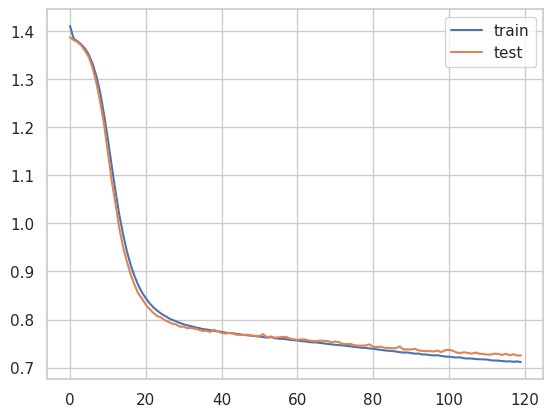

In [ ]:
history = ann.history.history
plt.plot(history['loss'],label='train')
plt.plot(history['val_loss'], label='test')
plt.legend()
plt.show()


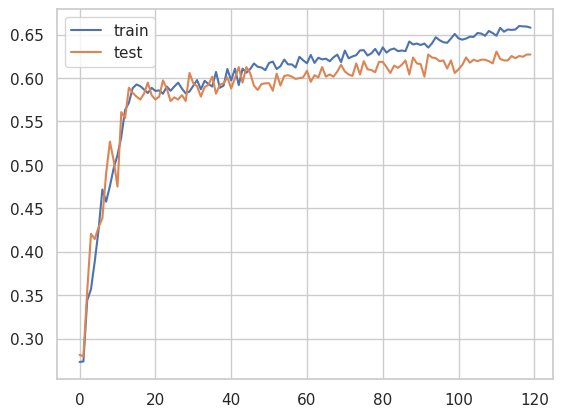

In [ ]:
history = ann.history.history
plt.plot(history['accuracy'],label='train')
plt.plot(history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
print("KNC de SMOTE (TRAIN)")
print("Accuracy:", accuracy_score(y_train_sm, y_pred_knc_sm_train))
print("Confusion Matrix:\n", confusion_matrix(y_train_sm, y_pred_knc_sm_train))
print("Classification Report:\n", classification_report(y_train_sm, y_pred_knc_sm_train))

KNC de SMOTE (TRAIN)
Accuracy: 0.7177891042780749
Confusion Matrix:
 [[4637  756  480   93]
 [1499 3566  805  132]
 [1341 1278 3191  184]
 [  58   40   89 5787]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.78      0.69      5966
           1       0.63      0.59      0.61      6002
           2       0.70      0.53      0.60      5994
           3       0.93      0.97      0.95      5974

    accuracy                           0.72     23936
   macro avg       0.72      0.72      0.71     23936
weighted avg       0.72      0.72      0.71     23936



In [ ]:
#imprimir las métricas, acc, recall, matriz de confusión
#Aplicar KNC

In [ ]:
knc_rus = KNeighborsClassifier(n_neighbors=5)

knc_rus.fit(X_train_rus, y_train_rus)

y_pred_knc_rus = knc_rus.predict(X_test_rus)

print("KNC de RUS (TEST)")
print("Accuracy:", accuracy_score(y_test_rus, y_pred_knc_rus))
print("Confusion Matrix:\n", confusion_matrix(y_test_rus, y_pred_knc_rus))
print("Classification Report:\n", classification_report(y_test_rus, y_pred_knc_rus))

print("---------------------------------\n")

y_pred_knc_rus_train = knc_rus.predict(X_train_rus)

print("KNC de RUS (TRAIN)")
print("Accuracy:", accuracy_score(y_train_rus, y_pred_knc_rus_train))
print("Confusion Matrix:\n", confusion_matrix(y_train_rus, y_pred_knc_rus_train))
print("Classification Report:\n", classification_report(y_train_rus, y_pred_knc_rus_train))

knc_ros = KNeighborsClassifier(n_neighbors=5)

knc_ros.fit(X_train_ros, y_train_ros)

y_pred_knc_ros = knc_ros.predict(X_test_ros)

print("KNC de ROS (TEST)")
print("Accuracy:", accuracy_score(y_test_ros, y_pred_knc_ros))
print("Confusion Matrix:\n", confusion_matrix(y_test_ros, y_pred_knc_ros))
print("Classification Report:\n", classification_report(y_test_ros, y_pred_knc_ros))

print("---------------------------------\n")

y_pred_knc_ros_train = knc_ros.predict(X_train_ros)

print("KNC de ROS (TRAIN)")
print("Accuracy:", accuracy_score(y_train_ros, y_pred_knc_ros_train))
print("Confusion Matrix:\n", confusion_matrix(y_train_ros, y_pred_knc_ros_train))
print("Classification Report:\n", classification_report(y_train_ros, y_pred_knc_ros_train))

knc_sm = KNeighborsClassifier(n_neighbors=5)

knc_sm.fit(X_train_sm, y_train_sm)

y_pred_knc_sm = knc_sm.predict(X_test_sm)

print("KNC de SMOTE (TEST)")
print("Accuracy:", accuracy_score(y_test_sm, y_pred_knc_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test_sm, y_pred_knc_sm))
print("Classification Report:\n", classification_report(y_test_sm, y_pred_knc_sm))

print("---------------------------------\n")

y_pred_knc_sm_train = knc_sm.predict(X_train_sm)

print("KNC de SMOTE (TRAIN)")
print("Accuracy:", accuracy_score(y_train_sm, y_pred_knc_sm_train))
print("Confusion Matrix:\n", confusion_matrix(y_train_sm, y_pred_knc_sm_train))
print("Classification Report:\n", classification_report(y_train_sm, y_pred_knc_sm_train))

KNC de RUS (TEST)
Accuracy: 0.40611724723874254
Confusion Matrix:
 [[112  92  55  14]
 [133  95  63   8]
 [ 97  85 109  12]
 [ 39  40  61 162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.41      0.34       273
           1       0.30      0.32      0.31       299
           2       0.38      0.36      0.37       303
           3       0.83      0.54      0.65       302

    accuracy                           0.41      1177
   macro avg       0.45      0.41      0.42      1177
weighted avg       0.46      0.41      0.42      1177

---------------------------------

KNC de RUS (TRAIN)
Accuracy: 0.6178032717229658
Confusion Matrix:
 [[819 192 152  35]
 [334 640 164  34]
 [263 269 589  47]
 [ 98  82 129 860]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.68      0.60      1198
           1       0.54      0.55      0.54      1172
           2       0.57      0.